------------------
```markdown
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com
```
------------------------------
❗❗❗ **IMPORTANT**❗❗❗ **Create a copy of this notebook**

In order to work with this Google Colab you need to create a copy of it. Please **DO NOT** provide your answers here. Instead, work on the copy version. To make a copy:

**Click on: File -> save a copy in drive**

Have you successfully created the copy? if yes, there must be a new tab opened in your browser. Now move to the copy and start from there!

----------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import beta, gaussian_kde, norm

# Standard Normal Distribution and Central Limit Theorem
This notebook is dedicated to explaining the most fundamental concepts of frequentist statistics, i.e., Normal distribution and Central Limit Theorem (CLT).

## Gaussian (Normal) Distribution
A Gaussian distribution is a continuous probability distribution that is fully
described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as
$$f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.$$
There are alternative notations such as
$X \sim \mathcal{N}(\mu, \sigma^2)$ or $X \sim \mathcal{N}(x|\mu, \sigma^2)$.

In [ ]:
# Plot the histogram of the following data
X = np.array([-0.64803536,  1.66664278, -3.58164733,  0.89998545,  1.62406002, -2.57298333,
  3.22436883,  1.95584301,  1.49037333, -2.41067398,  2.20394213,  3.88135545,
 -0.76729498,  0.07916849,  1.03565913,  2.88753066,  0.53484251,  2.00084301,
 -1.3125664,  3.76991427, -1.29491141,  0.1934997,  -1.21259305, -0.63283225,
  4.03442483,  1.81498421, -0.22410048,  1.90919324,  0.63397913,  1.47055774,
 -0.88504916,  0.71517192,  0.19569567,  0.79177696,  0.20603178, -1.24203431,
  0.34018339,  0.62462938,  4.59464763,  2.96896777, -2.50783614, -0.25056027,
  2.63913303,  0.13910112,  1.1671937,  -0.79290013,  2.47623536,  3.03226744,
  0.58648688,  0.20552603])
print("Mean =", X.mean(), "\n", "Variance =", X.var(), "\n---------")
# Your code

#### Exercise 1
Calculate the mean and varince of the random variable Z = 2*X - 3. What do you understand from it?

<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individual may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->

In [ ]:
# Your code

### Exercise 2
The heights of adults in a certain population are normally distributed with a mean of 175cm and a standard deviation of 7cm. What is the probability that a randomly selected person from this population is shorter than 170cm?

In [ ]:
pop_mean = 175
pop_std = 7
x = np.linspace(130, 220, 400)
y = norm.pdf(x=x, loc=pop_mean, scale=pop_std)
person_height = 170
height_prob = # Your code

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x < person_height), color='red', alpha=0.5, label='Region of interest')
plt.axvline(person_height, color='blue', linestyle='dashed', linewidth=2, label=f'Threshold = {person_height:.1f}')
plt.title('Normal distribution (height)')
plt.legend()
plt.xlabel('height')
plt.ylabel('Density')
plt.show()

### Exercise 3
Suppose the daily returns of a stock bundle follow a normal distribution with a mean of 0.05 and a standard deviation of 0.02. What is the probability that you will experience a loss on your investment tomorrow.

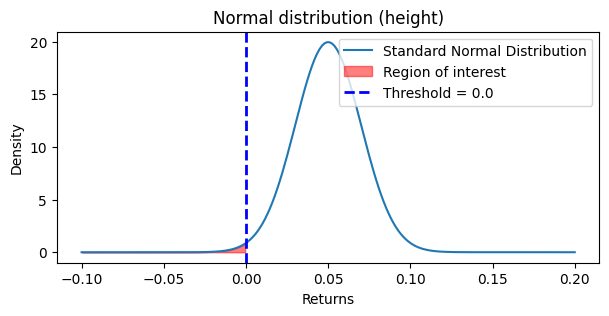

In [ ]:
pop_mean = 0.05
pop_std = 0.02
x = np.linspace(-0.1, 0.2, 200)
y = norm.pdf(x=x, loc=pop_mean, scale=pop_std)
loss_threshold = 0
loss_prob = # Your code

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x < loss_threshold), color='red', alpha=0.5, label='Region of interest')
plt.axvline(loss_threshold, color='blue', linestyle='dashed', linewidth=2, label=f'Threshold = {loss_threshold:.1f}')
plt.title('Normal distribution (height)')
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Density')
plt.show()

## Central Limit Theorem (CLT)
Before we begin with the theory, let us do the following experiment:

1. Choose a distribution at will and take samples from it (you can also plot the histogram to verify the distribution).

In [ ]:
sample_size = 50
# Here you define the parameters of your distribution
# Your code

# Sample data
sample_data = # Your code
plt.hisotgram(sample_data)
plt.show()

2. Now repeat the above process and each time you take a sample data calculate its mean and save it in a list.

In [ ]:
sample_size = 50
# Here you define the parameters of your distribution
# Your code

iter = 100
sample_means = []
# Sample data
for i in range(iter):
    sample_data = # Your code
    sample_means += [np.mean(sample_data)]

3. Now plot the histogram of the list of means you have computed. Compare it with others and report your observations.

In [ ]:
plt.hist(sample_means)
plt.show()

### Definition of CLT
Let us assume that we take a sample data of size $N$ from a distribution $X$. our sample would look like:
$$sample\ data = [X_1, X_2, \cdots, X_N].$$
Now if we repeat this sampling process, we will get a new sample, albiet with different data. The mean of this sample is different each time and can be calculated as
$$mean\ of\ sample\ data = \frac{1}{N} \sum_{i=1}^N X_i $$
We can simply see that the mean of sample data is varying, in fact it will have its own distribution if we repeat the process over and over again. The distribution of the mean, has a standard deviation too, which can be calculated as:
$$
\text{Standard Error (SE)} =\sqrt{\text{Var}\left(\frac{1}{N}\sum_{i=1}^N X_i\right)} = \sqrt{\frac{N \cdot \text{Var}(X_i)}{N^2}} = \frac{\sigma}{\sqrt{N}}
$$
The central limit theorem (CLT) states that, if we take multiple sufficently large samples (N>30) from a distribution (with mean $\mu$ and standard deviation $\sigma$) the distribution of the sample means converges to a standard normal distribution with mean $\mu_s$ and standard deviation $\sigma_{se}$. This holds even if the original distribution itself is not normally distributed. In other words:

$$\mu \approx \mu_s \approx \mathbb{E}\left(\frac{1}{N}\sum_i^NX_i\right).$$


We note that the standard deviation of the distribution of means (we call it standard error) is given by
$$ \text{Standard Error (SE)} =  \sigma_{se} = \frac{\sigma}{\sqrt{N}}$$

#### Exercise 4
In the example in the beginning of this section, verify that:
$$ \text{Standard Error (SE)} =  \sigma_{se} = \frac{\sigma}{\sqrt{N}}$$

In [ ]:
# Population
pop_size = 1000000

# Here you obtain the data from your distribution defined above
population = # Your code

pop_std = np.std(population)

# Calculate the standard deviation of the sample means
# Your code

# Theoretical standard error
theoretical_std_error = pop_std / np.sqrt(sample_size)

print(f"Observed Std of Sample Means: {sample_means_std:.4f}")
print(f"Theoretical Std Error (σ/√N): {theoretical_std_error:.4f}")

#### Exercis 5
Investigate how the sample size $N$ affects the distribution of sample means.

In [ ]:
sample_size = 60
# Here you define the parameters of your distribution
# Your code

iter = 100
sample_means = []
# Sample data
for i in range(iter):
    sample_data = # Your code
    sample_means += [np.mean(sample_data)]

sample_means_std = np.std(sample_means)
print(f"Observed Std of Sample Means: {sample_means_std:.4f}")
print(f"Theoretical Std Error (σ/√N): {theoretical_std_error:.4f}")

**Congratulations! You have finished the Notebook! Great Job!**
🤗🙌👍👏💪
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->